In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from datetime import date


dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [8]:
#feaure scaling
#making values of x between 0s and 1s

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0,1))
sc.fit_transform(x)
x = sc.fit_transform(x)


In [9]:
#training the SOM
from minisom import MiniSom
som = MiniSom(x=10,y=10, input_len=15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(x)
som.train_random(data=x,num_iteration=100)

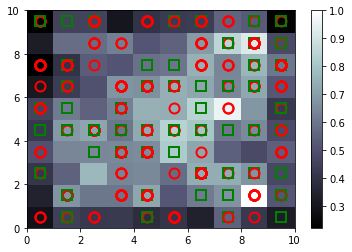

In [36]:
# from pylab import bone, pcolor, colorbar, plot, show
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, z in enumerate(x):
    w = som.winner(z)
    plt.plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
plt.show()

In [37]:
#mapping of winning node which is an outlier
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(8,1)], mappings[(7,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

#fraudlent customers

In [38]:
print("Fraud customer ID's")
for i in frauds[:,0]:
    print(int(i))

Fraud customer ID's
15596797
15600975
15704509
15592914
15611973
15623668
15688059
15646521
15599152
15660263
15615670
15575605
15660528
